# \#Analysis
## What did these accounts tweet about?  Who did they tweet with?

In [2]:
import os
import datetime
import regex as re
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
plt.style.use('fivethirtyeight')
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams.update({'font.size': 16})

In [4]:
from nltk.corpus import stopwords

In [5]:
eng_tweets = pd.read_pickle('../data/eng_tweets.p')

In [6]:
eng_tweets.account_category.value_counts()

RightTroll      646007
NewsFeed        541260
LeftTroll       385410
HashtagGamer    204239
Commercial      112580
Fearmonger       10524
Unknown           6496
Name: account_category, dtype: int64

In [7]:
targets = ['RightTroll', 'LeftTroll', 'NewsFeed']
subset = eng_tweets.loc[eng_tweets.account_category.isin(targets)]
subset.head()

,external_author_id,author,content,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,hashtags,mentions
0,906000000000000000,10_GOP,We have a sitting Democrat US Senator on trial...,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760,914580356430536707,[],[@nedryun]
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti Trump s...,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760,914621840496189440,[],[]
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,1,RightTroll,0,905874659358453760,914623490375979008,[#BoycottNFL],[]
3,906000000000000000,10_GOP,JUST IN President Trump dedicates Presidents C...,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,0,905874659358453760,914639143690555392,[],[]
4,906000000000000000,10_GOP,19000 RESPECTING our National Anthem Stand For...,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll,0,905874659358453760,914312219952861184,[#StandForOurAnthem],[]


In [8]:
hashtag_df = pd.DataFrame(subset.hashtags[subset.hashtags.apply(
    lambda hashtags_list: hashtags_list !=[])])

flattened_hashtags = hashtag_df.hashtags.tolist()
flattened_hashtags = [item for sublist in flattened_hashtags for item in sublist]

hashtag_frequency = Counter(pd.Series(flattened_hashtags))

In [9]:
mentions_df = pd.DataFrame(subset.mentions[
    subset.mentions.apply(lambda mention_list: mention_list !=[])])

flattened_mentions = mentions_df.mentions.tolist()
flattened_mentions = [item for sublist in flattened_mentions for item in sublist]
flattened_mentions = [item for item in flattened_mentions if item != '@']

mention_frequency = Counter(pd.Series(flattened_mentions))

In [10]:
right_hashtag_df = pd.DataFrame(subset.hashtags[(subset.hashtags.apply(
    lambda hashtags_list: hashtags_list !=[])) & 
    (subset.account_category=='RightTroll')])

right_flattened_hashtags = right_hashtag_df.hashtags.tolist()
right_flattened_hashtags = [item for sublist in right_flattened_hashtags for item in sublist]

right_hashtag_freq = Counter(pd.Series(right_flattened_hashtags).str.lower())

In [11]:
left_hashtag_df = pd.DataFrame(subset.hashtags[(subset.hashtags.apply(
    lambda hashtags_list: hashtags_list !=[])) & 
    (subset.account_category=='LeftTroll')])

left_flattened_hashtags = left_hashtag_df.hashtags.tolist()
left_flattened_hashtags = [item for sublist in left_flattened_hashtags for item in sublist]

left_hashtag_freq = Counter(pd.Series(left_flattened_hashtags).str.lower())

In [12]:
news_hashtag_df = pd.DataFrame(subset.hashtags[(subset.hashtags.apply(
    lambda hashtags_list: hashtags_list !=[])) & 
    (subset.account_category=='NewsFeed')])

news_flattened_hashtags = news_hashtag_df.hashtags.tolist()
news_flattened_hashtags = [item for sublist in news_flattened_hashtags for item in sublist]

news_hashtag_freq = Counter(pd.Series(news_flattened_hashtags).str.lower())

In [13]:
right_mentions_df = pd.DataFrame(subset.mentions[
    (subset.mentions.apply(lambda mention_list: mention_list !=[])) & 
    (subset.account_category=='RightTroll')])

right_flattened_mentions = right_mentions_df.mentions.tolist()
right_flattened_mentions = [item for sublist in right_flattened_mentions for item in sublist]
right_flattened_mentions = [item for item in right_flattened_mentions if item != '@']

right_mention_freq = Counter(pd.Series(right_flattened_mentions))

In [14]:
left_mentions_df = pd.DataFrame(subset.mentions[
    (subset.mentions.apply(lambda mention_list: mention_list !=[])) &
    (subset.account_category=='LeftTroll')])

left_flattened_mentions = left_mentions_df.mentions.tolist()
left_flattened_mentions = [item for sublist in left_flattened_mentions for item in sublist]
left_flattened_mentions = [item for item in left_flattened_mentions if item != '@']

left_mention_freq = Counter(pd.Series(left_flattened_mentions))

In [15]:
news_mentions_df = pd.DataFrame(subset.mentions[
    (subset.mentions.apply(lambda mention_list: mention_list !=[])) &
    (subset.account_category=='NewsFeed')])

news_flattened_mentions = news_mentions_df.mentions.tolist()
news_flattened_mentions = [item for sublist in news_flattened_mentions for item in sublist]
news_flattened_mentions = [item for item in news_flattened_mentions if item != '@']
news_mention_freq = Counter(pd.Series(news_flattened_mentions))

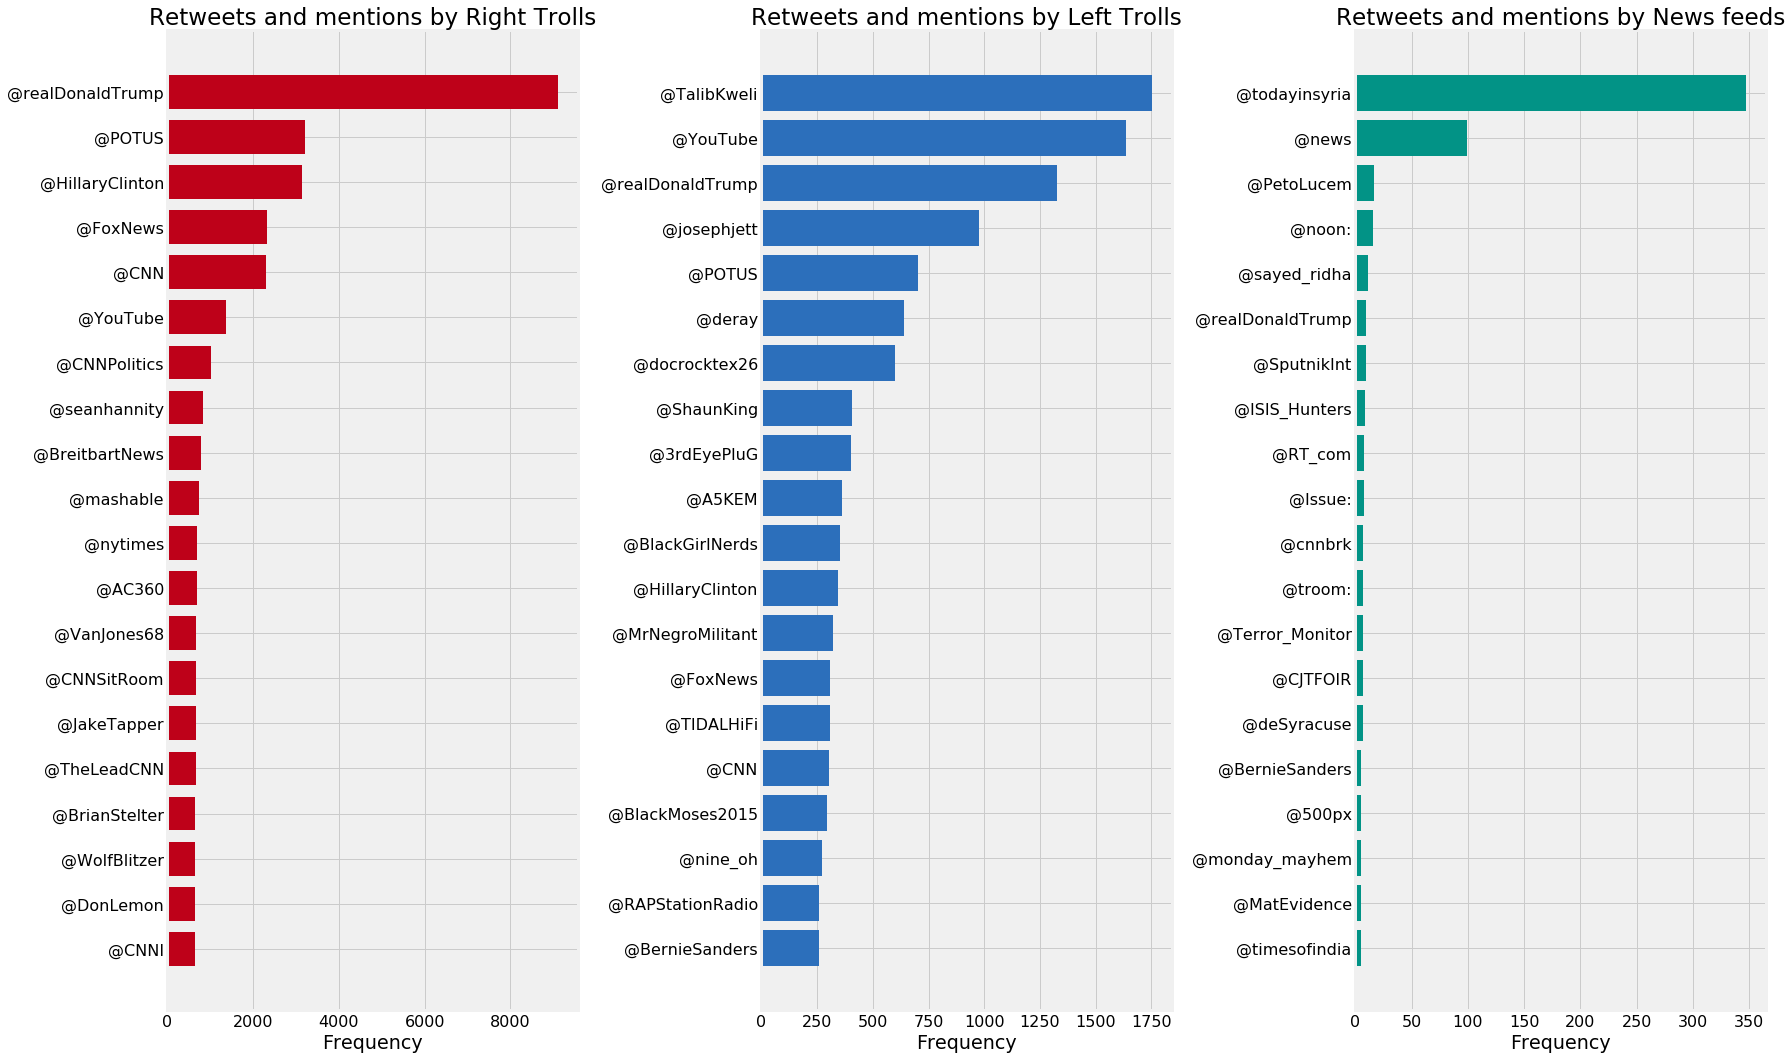

In [16]:
fig = plt.figure(figsize=(25,15))
bar_width = 0.75
bar_space = 0.5

plt.subplot(1,3,1)
top20right = right_mention_freq.most_common(20)
keys = [x[0] for x in top20right]
vals = [x[1] for x in top20right]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals, bar_width, color='#be0119')
plt.yticks(xpos,keys)
plt.title('Retweets and mentions by Right Trolls')
plt.xlabel('Frequency')

plt.subplot(1,3,2)
top20left = left_mention_freq.most_common(20)
keys = [x[0] for x in top20left]
vals = [x[1] for x in top20left]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals, color='#2c6fbb')
plt.yticks(xpos,keys)
plt.title('Retweets and mentions by Left Trolls')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
top20news = news_mention_freq.most_common(20)
keys = [x[0] for x in top20news]
vals = [x[1] for x in top20news]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals, color='#029386')
plt.yticks(xpos,keys)
plt.title('Retweets and mentions by News feeds')
plt.xlabel('Frequency')

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show();

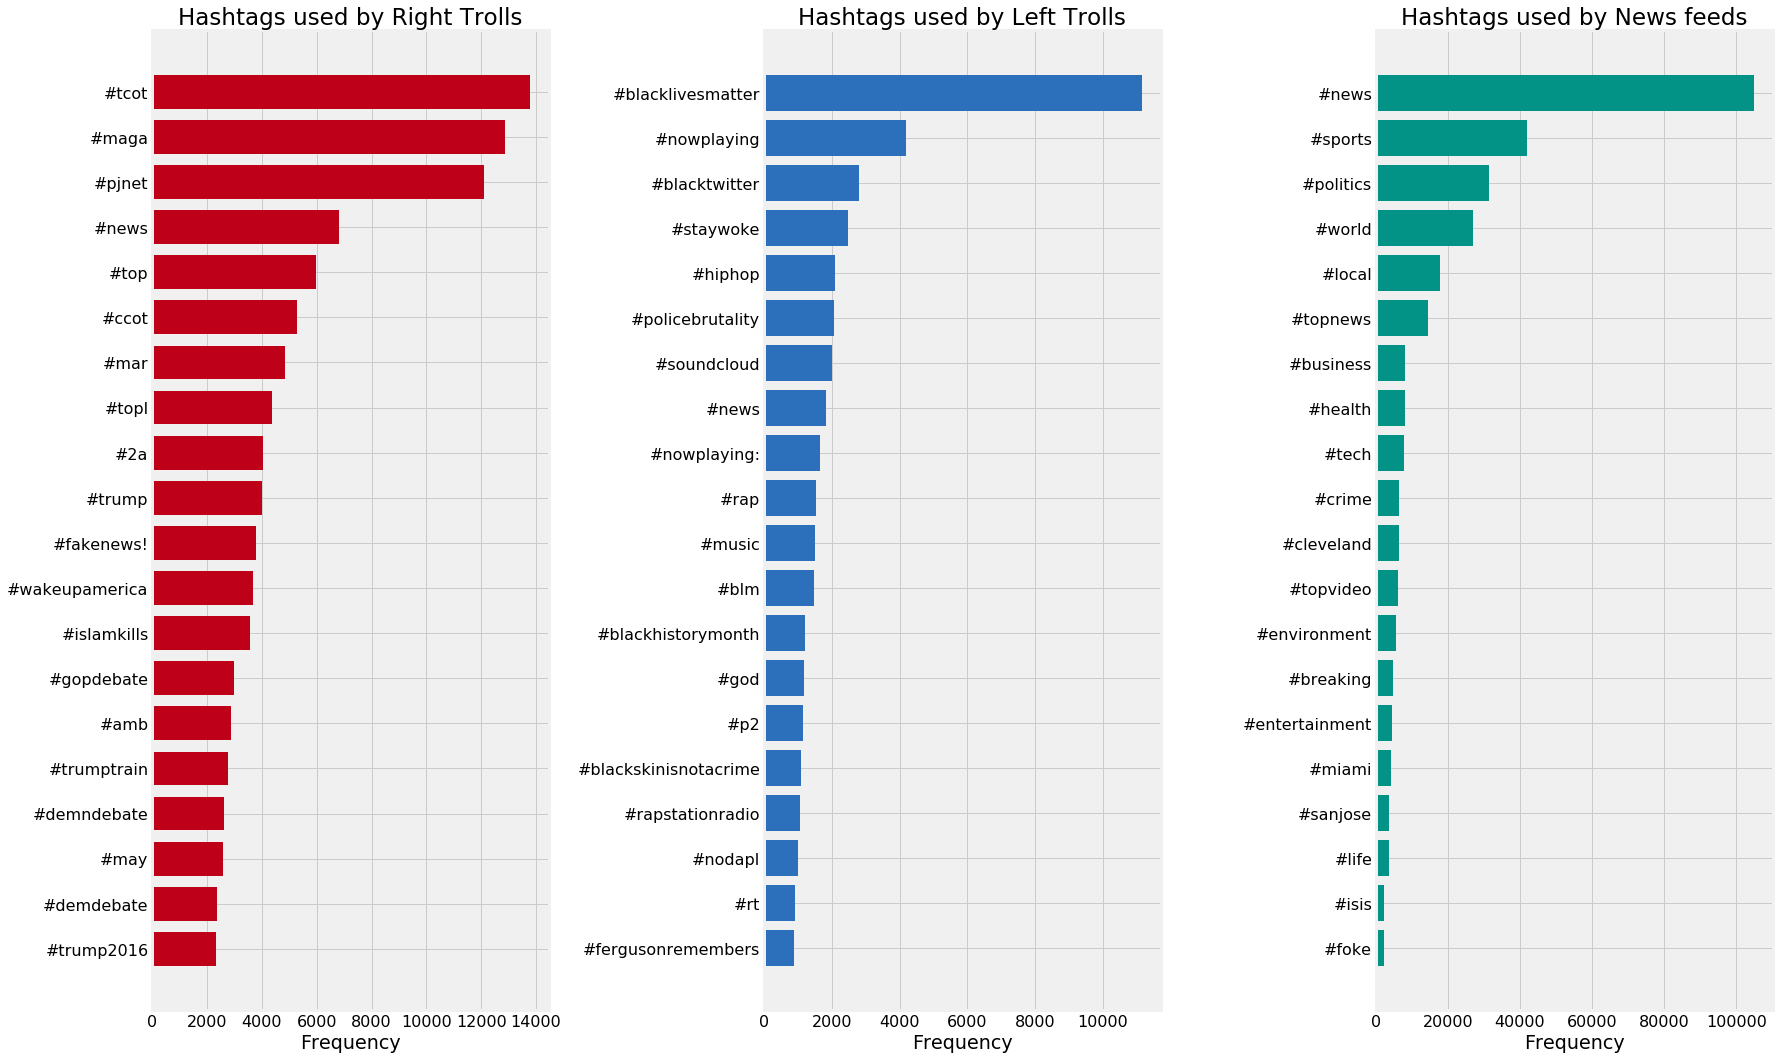

In [17]:
fig = plt.figure(figsize=(25,15))
bar_width = 0.75
bar_space = 0.5

plt.subplot(1,3,1)
top20right = right_hashtag_freq.most_common(20)
keys = [x[0] for x in top20right]
vals = [x[1] for x in top20right]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals, bar_width, color='#be0119')
plt.yticks(xpos,keys)
plt.title('Hashtags used by Right Trolls')
plt.xlabel('Frequency')

plt.subplot(1,3,2)
top20left = left_hashtag_freq.most_common(20)
keys = [x[0] for x in top20left]
vals = [x[1] for x in top20left]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals, color='#2c6fbb')
plt.yticks(xpos,keys)
plt.title('Hashtags used by Left Trolls')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
top20news = news_hashtag_freq.most_common(20)
keys = [x[0] for x in top20news]
vals = [x[1] for x in top20news]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals, color='#029386')
plt.yticks(xpos,keys)
plt.title('Hashtags used by News feeds')
plt.xlabel('Frequency')

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show();

## Hashtag correlation matrix: Are pairs of hashtags strongly correlated?

In [18]:
# select only observations where the hashtag list is not empty
targets = ['RightTroll', 'LeftTroll']
hashtag_df = pd.DataFrame(eng_tweets.hashtags[(eng_tweets.hashtags.apply(
    lambda hashtags_list: hashtags_list !=[])) & (eng_tweets.account_category.isin(targets))])

In [19]:
flattened_hashtags = hashtag_df.hashtags.tolist()
flattened_hashtags = pd.DataFrame([item for sublist in flattened_hashtags for item in sublist], columns=['hashtag'])
flattened_hashtags.hashtag = flattened_hashtags.hashtag.str.lower()

#flattened_hashtags.hashtag = flattened_hashtags.hashtag.str.lower()
flattened_hashtags.head()

,hashtag
0,#boycottnfl
1,#standforouranthem
2,#hiphopawards
3,#iran
4,#maga


In [20]:
# count of appearances of each hashtag
popular_hashtags = (flattened_hashtags.groupby('hashtag').size().reset_index(name='counts')
                                        .sort_values('counts', ascending=False)
                                        .reset_index(drop=True))
popular_hashtags.head()

,hashtag,counts
0,#tcot,14628
1,#maga,13034
2,#pjnet,12392
3,#blacklivesmatter,12298
4,#news,8666


In [21]:
# take hashtags which appear at least this amount of times
min_appearance = 2000
# find popular hashtags - make into python set for efficiency

popular_hashtags_set = set(popular_hashtags[popular_hashtags.counts>=min_appearance]['hashtag'])
#popular_hashtags_set

In [22]:
# make a new column with only the popular hashtags
flattened_hashtags['popular'] = flattened_hashtags.hashtag.isin(popular_hashtags_set)
flattened_hashtags.head()

,hashtag,popular
0,#boycottnfl,False
1,#standforouranthem,False
2,#hiphopawards,False
3,#iran,False
4,#maga,True


In [23]:
# drop rows without popular hashtag
popular_hashtags = flattened_hashtags.loc[flattened_hashtags.popular==True]

In [24]:
# make a new column with only the popular hashtags
hashtag_df['popular_hashtags'] = hashtag_df.hashtags.apply(lambda hashtag_list: 
                                                           [hashtag for hashtag in str(hashtag_list).lower() 
                                                            if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtag_df.loc[
            hashtag_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list != [])]

In [25]:
unique_popular_ht = pd.DataFrame(popular_hashtags.hashtag.value_counts())
unique_popular_ht = unique_popular_ht.reset_index()
unique_popular_ht.columns = ['hashtag','count']

In [26]:
## make new dataframe
hashtag_vector_df = unique_popular_ht.loc[:, ['hashtag']]

In [27]:
for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.hashtag.apply(lambda hashtag_list: int(set(hashtag).issubset(hashtag_list)))

In [28]:
#drop the row labels
hashtag_matrix = hashtag_vector_df.drop('hashtag', axis=1)

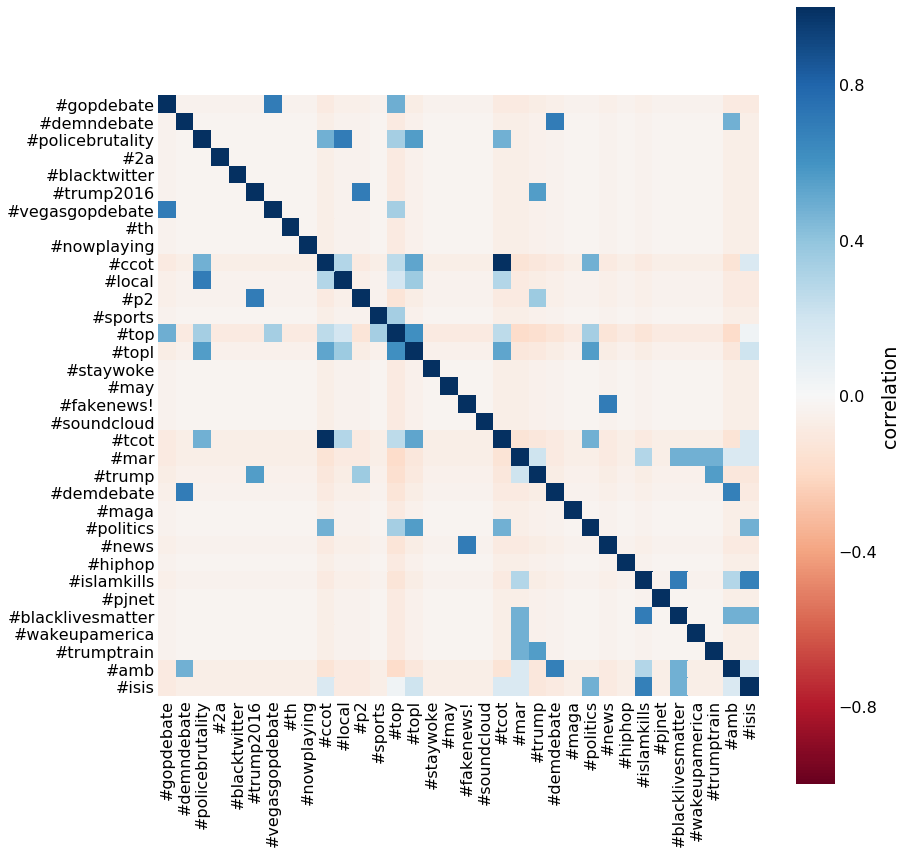

In [29]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(13,13))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show();